In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import ipywidgets
import ipdb
from plot_utils import get_model_names_for_degree

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)

['chebyshev_linear_regression_big_2x'
 'chebyshev_linear_regression_toy_0.2_noise'
 'chebyshev_linear_regression_toy_0.5_noise_0.00005_lr'
 'chebyshev_linear_regression_toy_11_take_1'
 'chebyshev_linear_regression_toy_16_layers'
 'chebyshev_linear_regression_toy_chebyshev_as_baseline_for_loss'
 'chebyshev_linear_regression_toy_just_base_8'
 'chebyshev_linear_regression_toy_noise'
 'chebyshev_linear_regression_toy_standard_0.00005_lr_no_noise_no_curriculum'
 'chebyshev_linear_regression_toy_uniform_sampling'
 'chebyshev_linear_regression_toy_weighted_mse' 'curriculum'
 'kernel_linear_regression_toy_basis_4'
 'kernel_linear_regression_toy_basis_4_dim_1'
 'kernel_linear_regression_toy_basis_4_normalized'
 'kernel_linear_regression_toy_basis_4_normalized_x_scale_2'
 'kernel_linear_regression_toy_dim_20_basis_2'
 'kernel_linear_regression_toy_just_basis_4_log' 'lr00005']
                                          run_id                      task  \
7                            chebyshev-2x-0

In [14]:
task = "kernel_linear_regression"

run_id = 'model1'
run_path = '../models/kernel_linear_regression/model1' # enter the path to the downloaded checkpoint folder here, if this is not where it is located
metrics = get_run_metrics(run_path, include_noise=False, ground_truth_loss=False, smoothing=0.00)  # these are normally precomputed at the end of training


../models/kernel_linear_regression/curriculum_big/metrics.json
no metrics found
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Si

# Plot pre-computed metrics

curriculum curriculum_big
../models/kernel_linear_regression/curriculum_big/metrics.json
{'degree-1': {'chebyshev_1_driver=None': {'mean': [1.4180854558944702, 0.48650917410850525, 3.3116558106893734e-11, 7.341973844209385e-14, 8.460404279280256e-14, 2.6253901396627866e-14, 1.473170205073225e-14, 3.0294472171728953e-14, 2.562883173913566e-14, 7.528796786308509e-14, 1.5661069988591458e-14, 2.6356494027199306e-14, 1.9684893228259434e-14, 1.4482267788424805e-14, 2.2095316909117625e-14, 3.017548098329867e-14, 1.3935250522956188e-14, 1.650642750467609e-14, 2.1350537779255864e-14, 1.5141659220939754e-14, 1.6779903950158402e-14, 2.0209802933804713e-14, 1.1754426980912537e-14, 3.6065849742458744e-14, 3.3211545221855515e-14, 2.1097310503410613e-14, 1.3892768432519596e-14, 1.3305166430416238e-14, 1.8128007707690456e-14, 6.842437857632055e-14, 2.5060013539670613e-14, 6.188089320471879e-14, 1.1473300133850624e-14, 1.323815765395895e-14, 1.1723326472188201e-14, 2.9317355292567127e-14, 1.22911511020

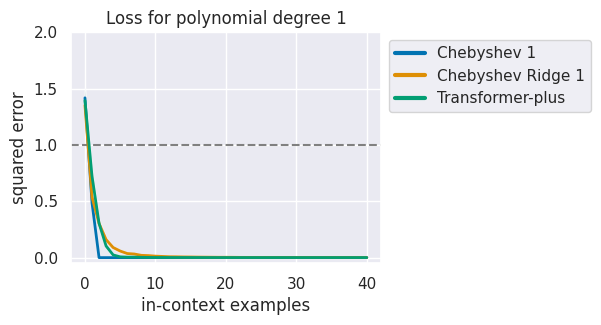

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 2', 'Chebyshev Ridge 2', 'Transformer-plus'])


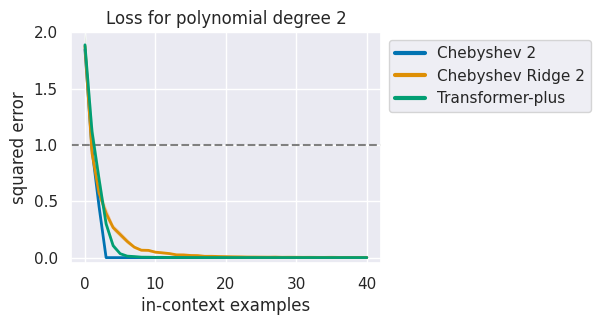

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 3', 'Chebyshev Ridge 3', 'Transformer-plus'])


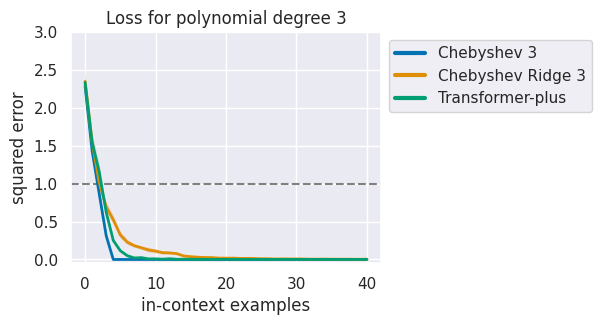

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 4', 'Chebyshev Ridge 4', 'Transformer-plus'])


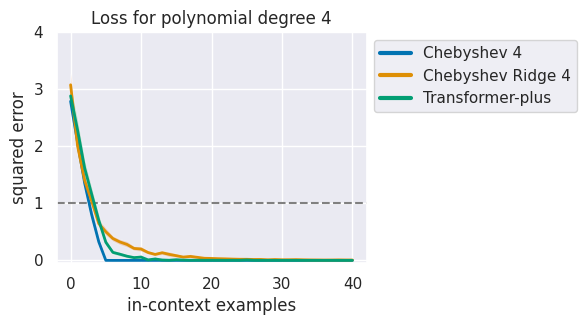

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 5', 'Chebyshev Ridge 5', 'Transformer-plus'])


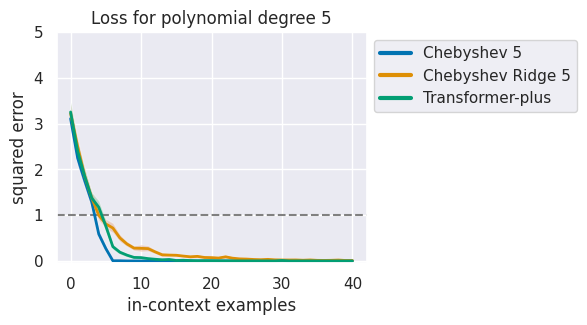

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 6', 'Chebyshev Ridge 6', 'Transformer-plus'])


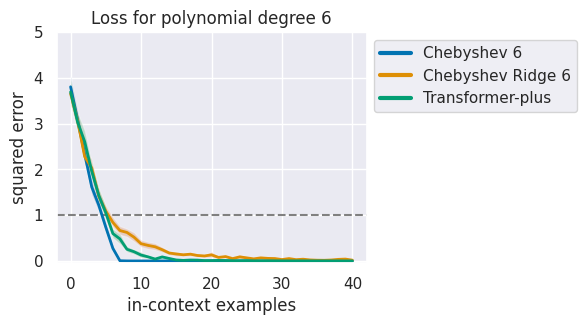

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 7', 'Chebyshev Ridge 7', 'Transformer-plus'])


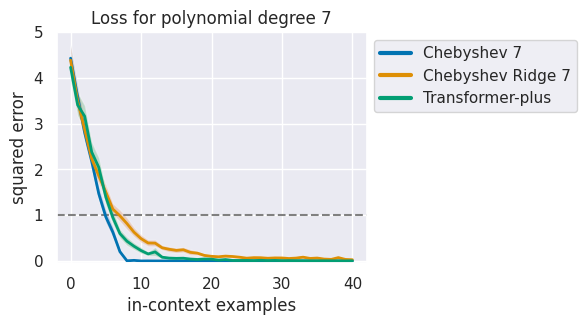

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 8', 'Chebyshev Ridge 8', 'Transformer-plus'])


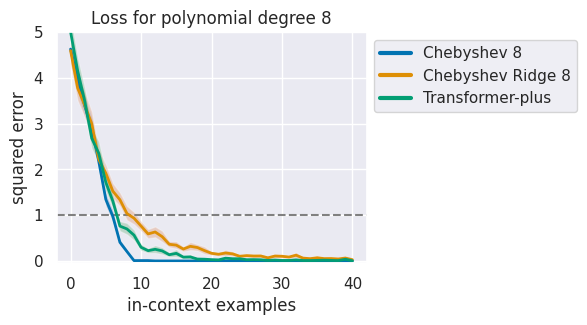

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 9', 'Chebyshev Ridge 9', 'Transformer-plus'])


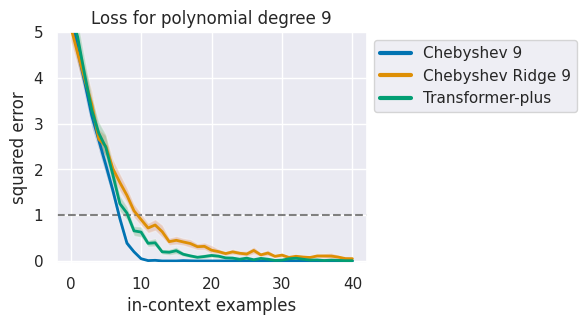

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 10', 'Chebyshev Ridge 10', 'Transformer-plus'])


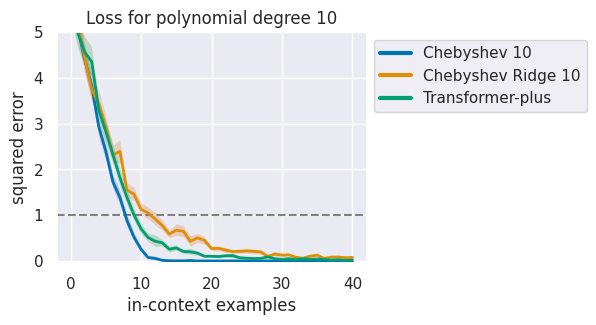

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 11', 'Chebyshev Ridge 11', 'Transformer-plus'])


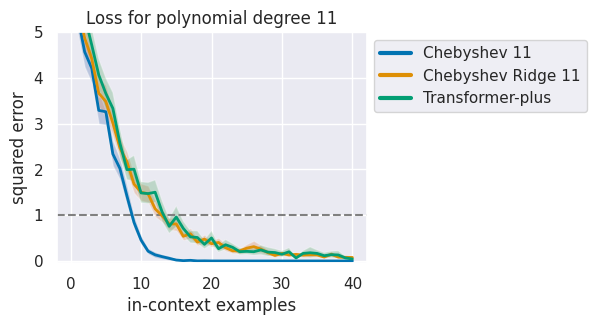

In [15]:
def valid_row(r, run_id):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.00)
print(metrics["degree-" + str(1)])

_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims


ylims = [2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5]
for degree in range(1, 12):
    models = get_model_names_for_degree(degree)
    print(models)
    print(metrics.keys())
    print(metrics["degree-" + str(degree)].keys())
    basic_plot(metrics["degree-" + str(degree)], models=models, ylim=ylims[degree-1])
    plt.title("Loss for polynomial degree " + str(degree))
    plt.savefig("graphs/degree-" + str(degree) + ".png", dpi=300, bbox_inches='tight')
    plt.show()